In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
df = pd.read_csv('/Users/santruptshekhar/Desktop/newcustomer2.csv')

In [9]:
df

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,66.0,60
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53.0,50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,49.0,40
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44.0,40
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,58.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000,64.0,60
711,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000,22.0,20
712,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000,69.0,60
713,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000,71.0,70


In [14]:
#New vs Old Customers Age Distribution

/var/folders/_d/g5lby8x90cb5pw610257gcc40000gp/T/ipykernel_94033/3761968619.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age Group'], kde=False, bins=15)


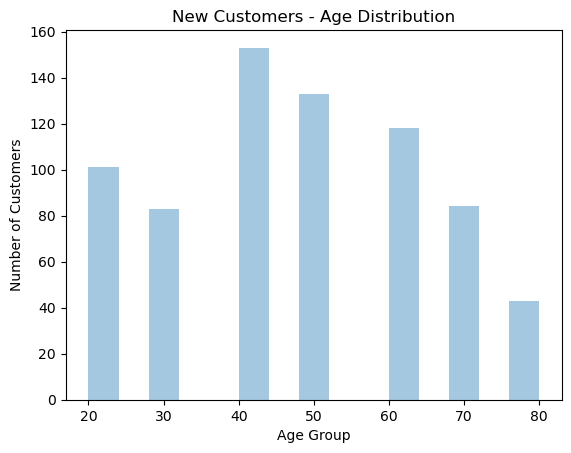

In [15]:
sns.distplot(df['Age Group'], kde=False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Age Distribution')
plt.show()

In [16]:
rfm_df=pd.read_csv('/Users/santruptshekhar/Desktop/analytics_project/csv_files/rfm_analysis.csv')

/var/folders/_d/g5lby8x90cb5pw610257gcc40000gp/T/ipykernel_94033/3488622537.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df['Age_Group'], kde=False, bins=15)


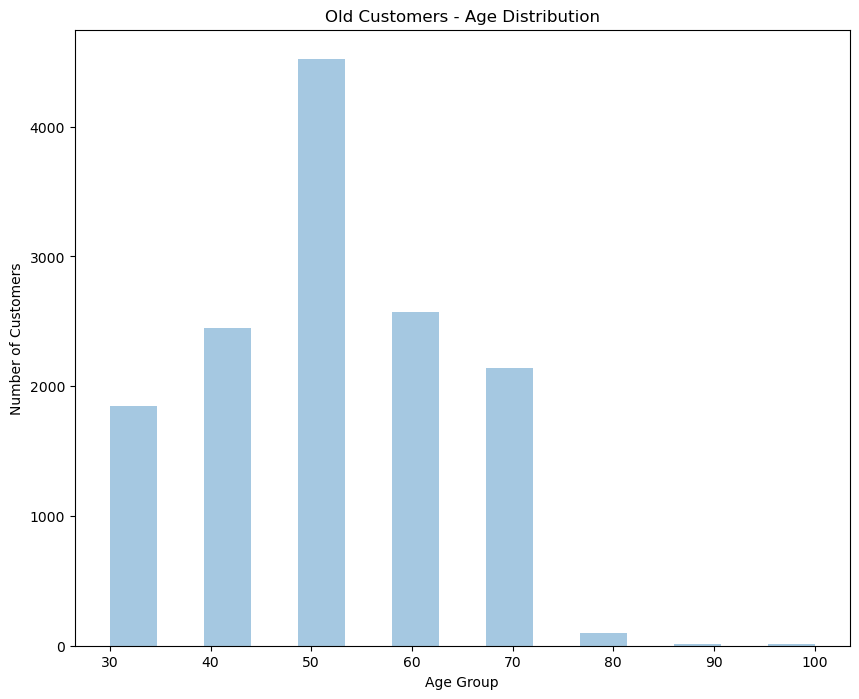

In [17]:
plt.figure(figsize=(10,8))
sns.distplot(rfm_df['Age_Group'], kde=False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Age Distribution')

plt.show()

In [26]:
#Bike related purchases over last 3 years by gender

In [19]:
bike_purchase_by_gender = rfm_df.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}).reset_index()
bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases
0,Female,339894
1,Male,335302


In [20]:
total =rfm_df['past_3_years_bike_related_purchases'].sum()
total

675196

In [25]:
bike_purchase_by_gender['Percent_of_total'] = (bike_purchase_by_gender['past_3_years_bike_related_purchases']/total)*100
bike_purchase_by_gender


,gender,past_3_years_bike_related_purchases,Percent_of_total
0,Female,339894,50.340049
1,Male,335302,49.659951


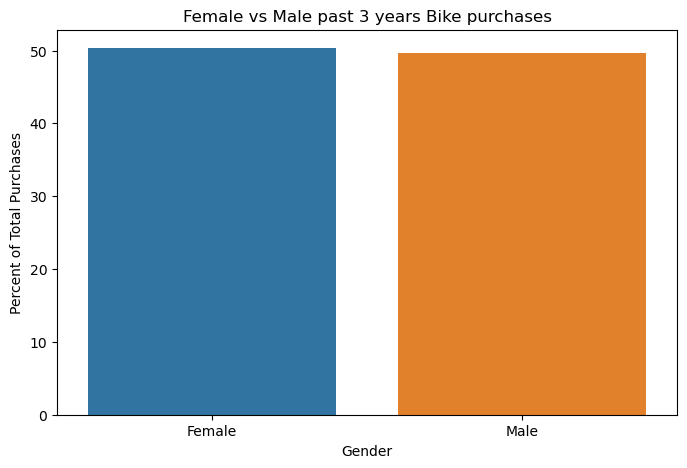

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender',y='Percent_of_total', data=bike_purchase_by_gender)
plt.xlabel('Gender')
plt.ylabel('Percent of Total Purchases')
plt.title('Female vs Male past 3 years Bike purchases')
plt.show()

In [27]:
#Job Industry Customer Distribution (New vs Old)

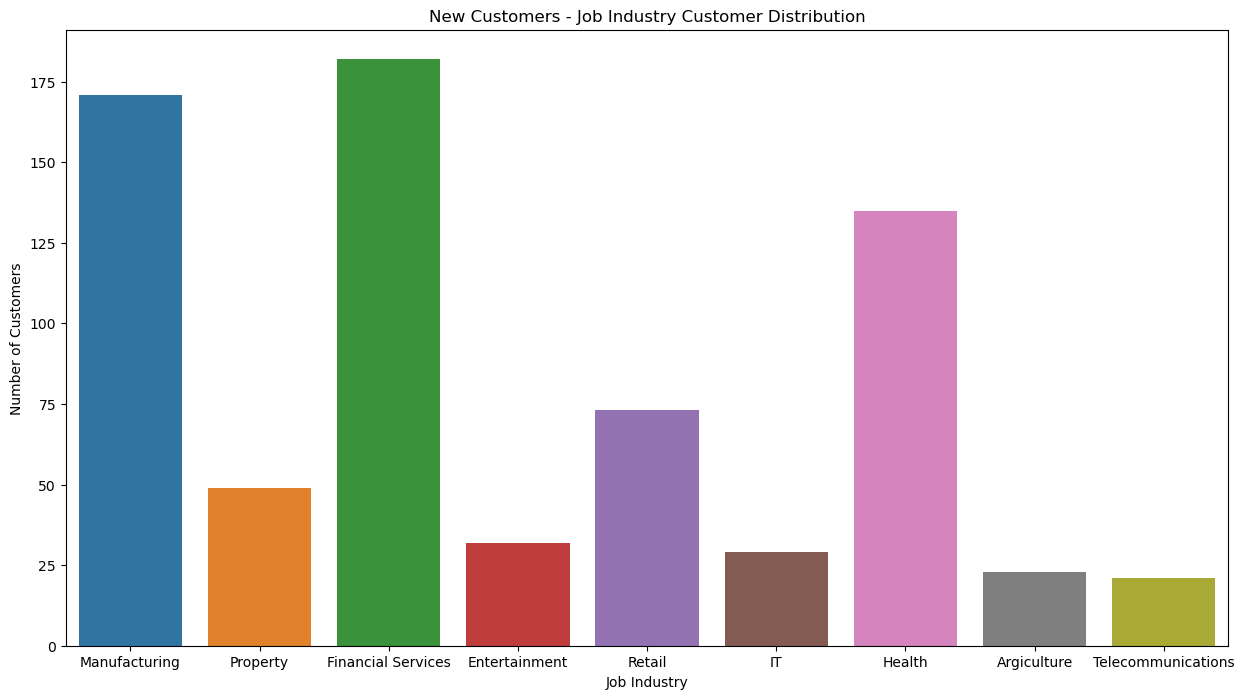

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=df[~(df['job_industry_category']=='Missing')])
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('New Customers - Job Industry Customer Distribution')
plt.show()

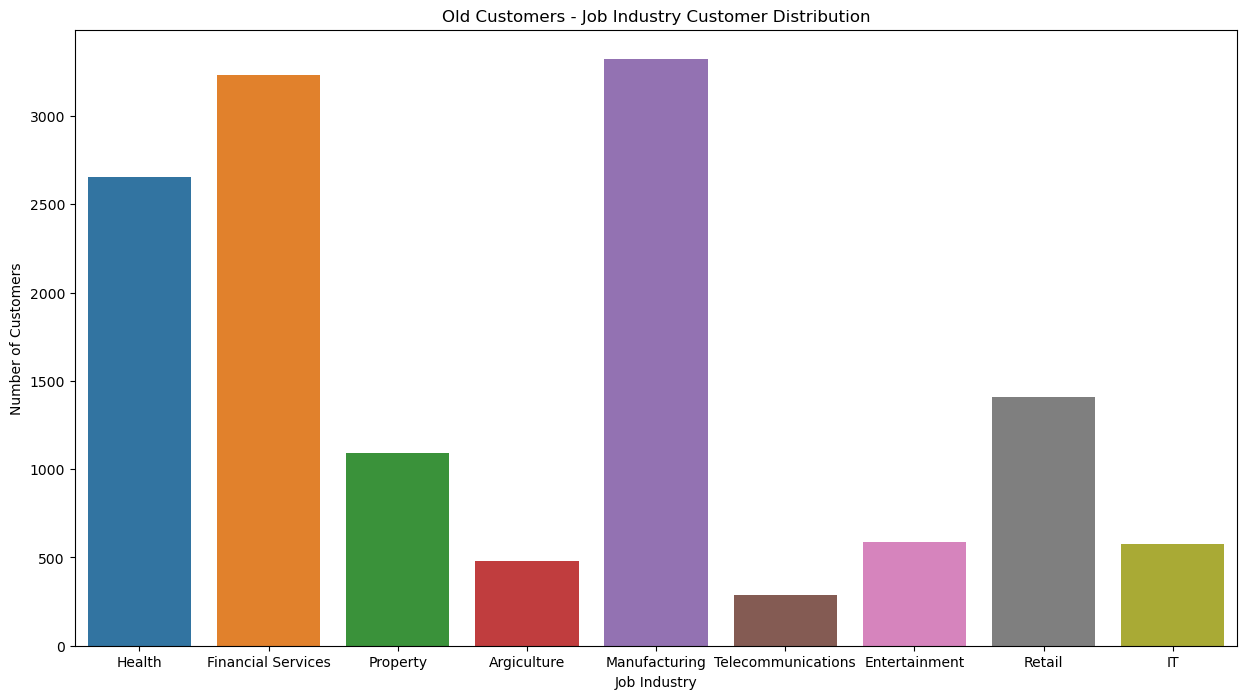

In [44]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=rfm_df[~(rfm_df['job_industry_category']=='Missing')])
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Job Industry Customer Distribution')
plt.show()

In [43]:
#Wealth Segmentation by Age Group

In [35]:
wealth_age_seg_new = df.groupby(['wealth_segment', 'Age Group']).size().reset_index()
wealth_age_seg_new

,wealth_segment,Age Group,0
0,Affluent Customer,20,32
1,Affluent Customer,30,15
2,Affluent Customer,40,38
3,Affluent Customer,50,32
4,Affluent Customer,60,23
5,Affluent Customer,70,24
6,Affluent Customer,80,9
7,High Net Worth,20,22
8,High Net Worth,30,27
9,High Net Worth,40,39


In [40]:
wealth_age_seg_new.columns=['wealth_segment','Age Group','Number_of_Customers'] #renaming columns

In [41]:
wealth_age_seg_new

,wealth_segment,Age Group,Number_of_Customers
0,Affluent Customer,20,32
1,Affluent Customer,30,15
2,Affluent Customer,40,38
3,Affluent Customer,50,32
4,Affluent Customer,60,23
5,Affluent Customer,70,24
6,Affluent Customer,80,9
7,High Net Worth,20,22
8,High Net Worth,30,27
9,High Net Worth,40,39


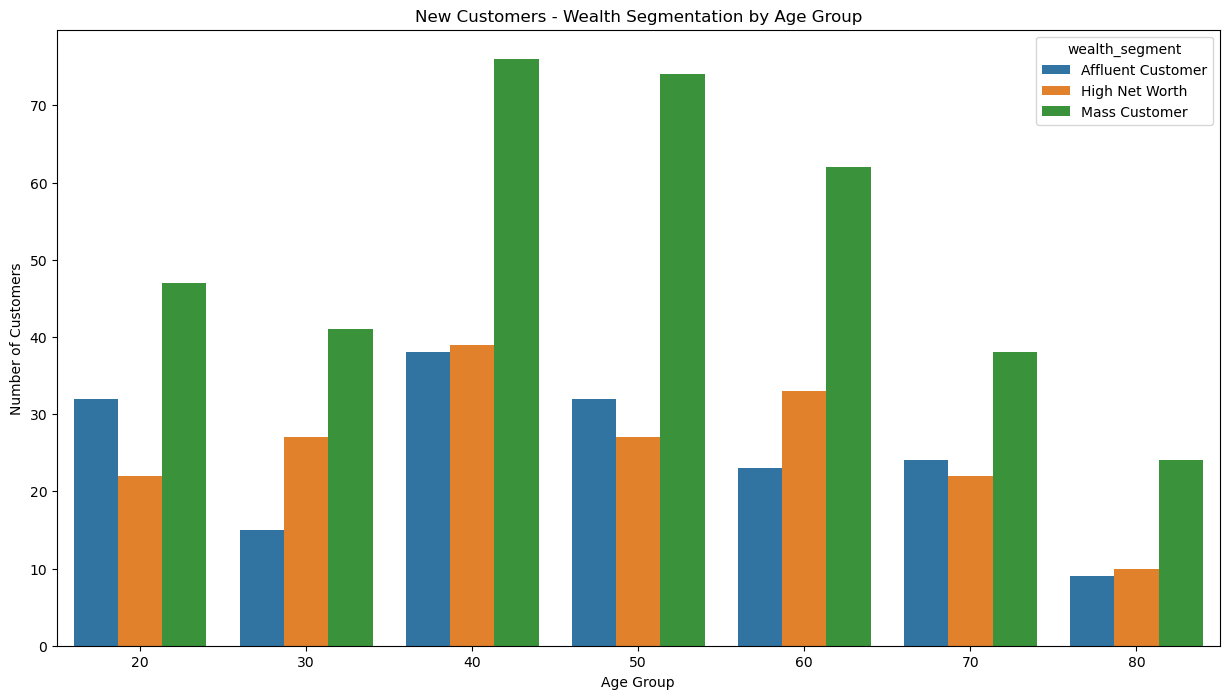

In [46]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age Group', y='Number_of_Customers' , hue='wealth_segment', data=wealth_age_seg_new)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Wealth Segmentation by Age Group')
plt.show()

In [47]:
wealth_age_seg_old = rfm_df.groupby(['wealth_segment', 'Age_Group']).size().reset_index()
wealth_age_seg_old

,wealth_segment,Age_Group,0
0,Affluent Customer,30,546
1,Affluent Customer,40,586
2,Affluent Customer,50,1046
3,Affluent Customer,60,632
4,Affluent Customer,70,538
5,Affluent Customer,80,27
6,Affluent Customer,100,10
7,High Net Worth,30,415
8,High Net Worth,40,720
9,High Net Worth,50,1165


In [48]:
wealth_age_seg_old.columns=['wealth_segment','Age Group','Number_of_Customers'] #renaming columns

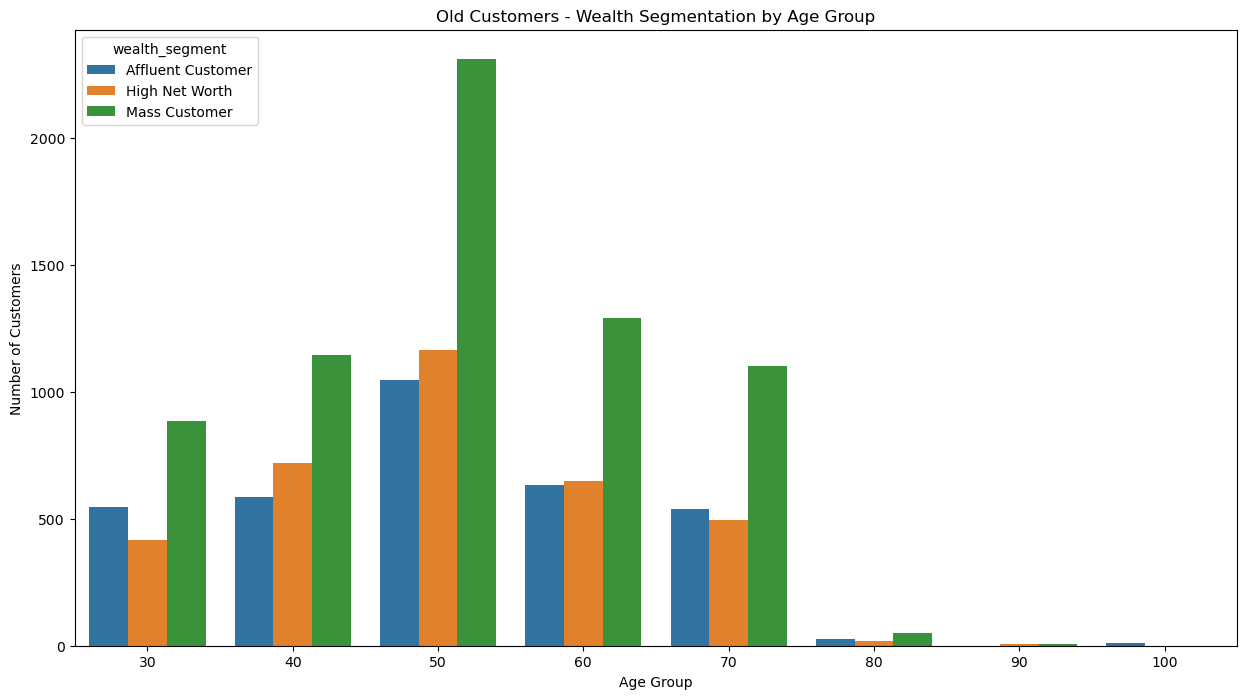

In [49]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age Group', y='Number_of_Customers' , hue='wealth_segment', data=wealth_age_seg_old)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Wealth Segmentation by Age Group')
plt.show()

In [50]:
# Loading the Customer Address Dataset.

add_df = pd.read_csv('/Users/santruptshekhar/Desktop/analytics_project/csv_files/customeradress.csv')

In [51]:
#merging with rfm_df
rfm_add = pd.merge(rfm_df, add_df, left_on = 'customer_id' ,right_on = 'customer_id', how='inner')

In [52]:
rfm_add

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,m_quartile,rfm_score,Age_Group,detail_cust_title,customer_title,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,3,443,80,Very Loyal,Very Loyal,060 Morning Avenue,2016,NSW,Australia,10
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,3,443,80,Very Loyal,Very Loyal,060 Morning Avenue,2016,NSW,Australia,10
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,3,443,80,Very Loyal,Very Loyal,060 Morning Avenue,2016,NSW,Australia,10
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,3,443,80,Very Loyal,Very Loyal,060 Morning Avenue,2016,NSW,Australia,10
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,3,443,80,Very Loyal,Very Loyal,060 Morning Avenue,2016,NSW,Australia,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13623,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,2,112,40,Evasive Customer,Evasive Customer,2565 Caliangt Point,2171,NSW,Australia,9
13624,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,2,112,40,Evasive Customer,Evasive Customer,2565 Caliangt Point,2171,NSW,Australia,9
13625,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,1,311,40,Late Bloomer,Late Bloomer,96 Delladonna Trail,3976,VIC,Australia,5
13626,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,1,311,40,Late Bloomer,Late Bloomer,96 Delladonna Trail,3976,VIC,Australia,5


In [54]:
#creating a new datset
state_df = rfm_add[['state' , 'owns_car' , 'customer_id']].drop_duplicates().groupby(['state', 'owns_car']).size().reset_index()

In [55]:
state_df

,state,owns_car,0
0,NSW,No,634
1,NSW,Yes,668
2,QLD,No,259
3,QLD,Yes,270
4,VIC,No,279
5,VIC,Yes,283
6,Victoria,No,24
7,Victoria,Yes,29


In [56]:
state_df.columns=['state','owns_car','Number_of_Customers'] #renaming columns

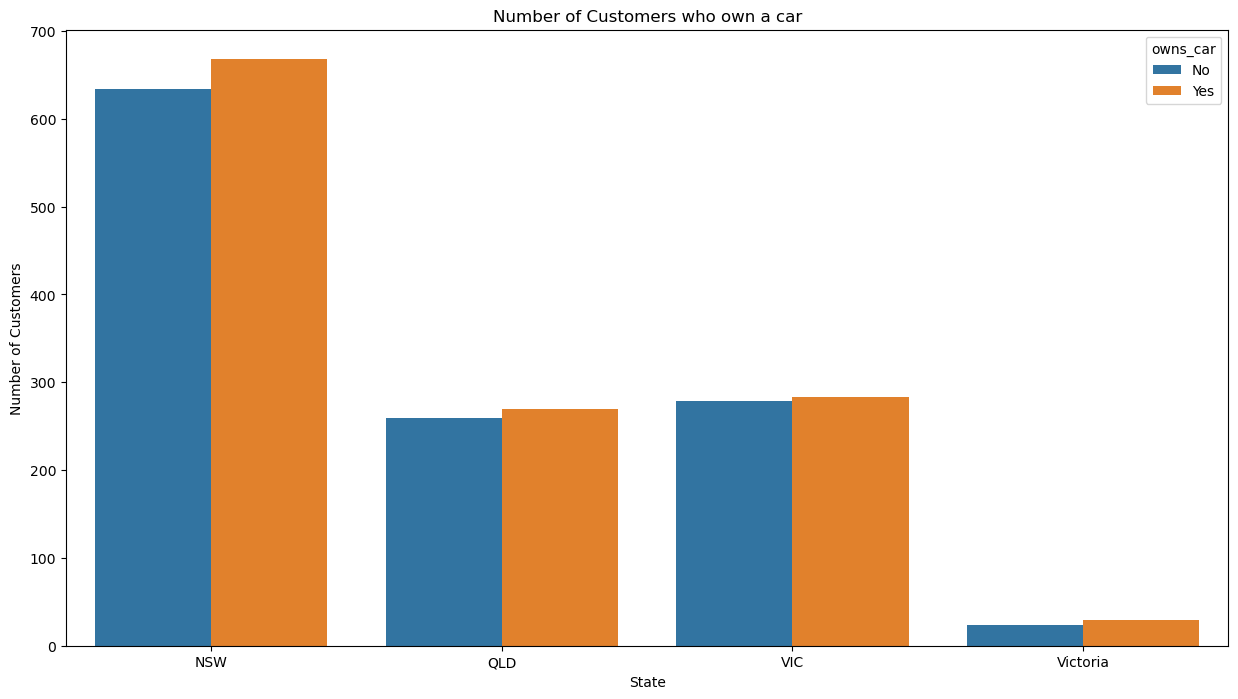

In [59]:
plt.figure(figsize=(15,8))
sns.barplot(x='state', y='Number_of_Customers' , hue='owns_car', data=state_df)
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Number of Customers who own a car')
plt.show()